# IMO statistika

Za svoj projekt sem si izbral analizo matematičnega tekmovanja tekmovanja IMO. Vse podatke sem dobil na [uradni IMO strani](http://www.imo-official.org). Zbral sem vse individualne rezultate zadnjih desetih let.

## Zajeti podatki:

- id 
- ime tekmovalca
- kratko ime države
- ime države
- točke po nalogah
- skupne točke
- mesto
- priznanje
- leto

Analiziral bom uspešnost posameznikov, slovenije, kateri so najboljši tekmovalci, katere države so najuspešnejše, kakšne so bile meje za nagrade, katere naloge so bile najtežje in kakšnen je bil povprečen rezultat v letih.

In [1]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

Za začetek si oglejmo, kako izgledajo zajeti podatki, za lažjo predstavo, kaj bomo analizirali.

In [2]:
data = pd.read_csv('data.csv',index_col = 'id' )
data

,Name,Short_country_name,Full_country_name,P1,P2,P3,P4,P5,P6,Points,Rank,Year,Achievement
id,,,,,,,,,,,,,
15785,Konstantin Matveev,RUS,Russian Federation,7,7,2,7,7,7,37,1,2007,Gold medal
7867,Peter Scholze,GER,Germany,7,7,1,7,7,7,36,2,2007,Gold medal
8821,Caili Shen,CHN,People's Republic of China,7,7,7,7,7,1,36,2,2007,Gold medal
15607,Pietro Vertechi,ITA,Italy,7,7,0,7,7,7,35,4,2007,Gold medal
8976,Danylo Radchenko,UKR,Ukraine,7,7,0,7,7,7,35,4,2007,Gold medal
15784,Maria Ilyukhina,RUS,Russian Federation,7,7,5,7,7,1,34,6,2007,Gold medal
7893,Toshiki Kataoka,JPN,Japan,7,7,3,7,7,1,32,7,2007,Gold medal
8364,Whan Ghang,KOR,Republic of Korea,7,7,4,7,7,0,32,7,2007,Gold medal
15770,Livia Alexandra Ilie,ROU,Romania,7,7,4,7,7,0,32,7,2007,Gold medal


Našim podatkom bom dodal še en stolpec in sicer **Percentage**, 

In [4]:
data['Percentage'] = data['Points'] / 42 * 100
data

,Name,Short_country_name,Full_country_name,P1,P2,P3,P4,P5,P6,Points,Rank,Year,Achievement,Percentage
id,,,,,,,,,,,,,,
15785,Konstantin Matveev,RUS,Russian Federation,7,7,2,7,7,7,37,1,2007,Gold medal,88.095238
7867,Peter Scholze,GER,Germany,7,7,1,7,7,7,36,2,2007,Gold medal,85.714286
8821,Caili Shen,CHN,People's Republic of China,7,7,7,7,7,1,36,2,2007,Gold medal,85.714286
15607,Pietro Vertechi,ITA,Italy,7,7,0,7,7,7,35,4,2007,Gold medal,83.333333
8976,Danylo Radchenko,UKR,Ukraine,7,7,0,7,7,7,35,4,2007,Gold medal,83.333333
15784,Maria Ilyukhina,RUS,Russian Federation,7,7,5,7,7,1,34,6,2007,Gold medal,80.952381
7893,Toshiki Kataoka,JPN,Japan,7,7,3,7,7,1,32,7,2007,Gold medal,76.190476
8364,Whan Ghang,KOR,Republic of Korea,7,7,4,7,7,0,32,7,2007,Gold medal,76.190476
15770,Livia Alexandra Ilie,ROU,Romania,7,7,4,7,7,0,32,7,2007,Gold medal,76.190476


Spodnji graf nam prikazuje procentualno porazdelitev tekmovalcev po številu doseženih točk. Razlog zakaj se pojavijo skoki tiči v tem, da pri posamezni nalogi večina tekmovalcev dobi vse možne točke, ali pa skoraj nič. To podpira tudi dejstvo, da je skokov ravno 6, kolikor je tudi nalog.

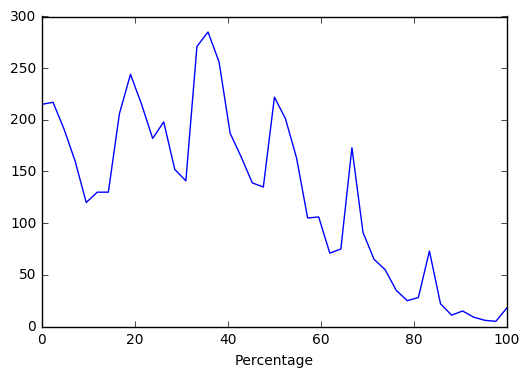

In [5]:
data.groupby('Percentage').size().plot()

Poglejmo si, kateri tekmovalci so skupno zbrali najvel točk, oz. so bili zelo uspešni na tekmovanju več kot eno leto.

In [6]:
best_competitors = data.groupby('Name')
best_competitors['Points'].sum().sort_values(ascending=False)[:20]

Name
Zhuo Qun (Alex) Song                 196
Teodor von Burg                      185
Lisa Sauermann                       176
Jeck Lim                             162
Nipun Pitimanaaree                   158
Omer Cerrahoglu                      148
Alexander Gunning                    131
Evan O'Dorney                        125
Melih Üçer                           122
Dong Ryul Kim                        116
Diego Alonso Roque Montoya           114
Warren Li                            114
Kevin Sun                            113
Andrew Carlotti                      111
Allen Liu                            110
Makoto Soejima                       107
Martin Vodička                       105
Andrea Fogari                        103
Ufuk Kanat                           102
Christian Omar Altamirano Modesto    101
Name: Points, dtype: int64

Spodnja tabela nam prikazuje povprečno število doseženih točk pri posamezni nalogi za vsako leto posebej. Očitno je bila najtežje naloga v zadnjem desetletju na tem tekmovanju 6 naloga iz leta 2007. Za nadobudne matematike je naloga z rešitvijo objavljena na [povezava](http://www.artofproblemsolving.com/wiki/index.php?title=2007_IMO_Problems/Problem_6).

In [7]:
po_letih = data.groupby('Year')
najtežja_naloga = po_letih[['P1','P2','P3','P4','P5','P6']].mean()
najtežja_naloga

,P1,P2,P3,P4,P5,P6
Year,,,,,,
2007,3.382692,2.519231,0.303846,5.680769,1.898077,0.151923
2008,4.979439,2.562617,0.803738,4.401869,2.076636,0.259813
2009,4.803540,3.709735,1.019469,2.915044,2.474336,0.168142
2010,5.449612,2.577519,0.465116,5.344961,0.932171,0.368217
2011,5.348135,0.653641,1.055062,4.069272,3.259325,0.317940
2012,5.625229,2.550274,0.413163,3.765996,1.663620,0.336380
2013,4.108159,2.525617,0.785579,5.442125,2.451613,0.296015
2014,5.348214,2.971429,0.505357,5.189286,1.708929,0.339286
2015,4.306759,1.358752,0.653380,4.793761,1.512998,0.355286


Graf nam prikazuje, povprečnega tekmovalca skozi čas. Vsako leto je reševal 6 nalog, točno koliko točk je dosegel pri posamični nalogi, pa je razvidno iz zgornje tabele.

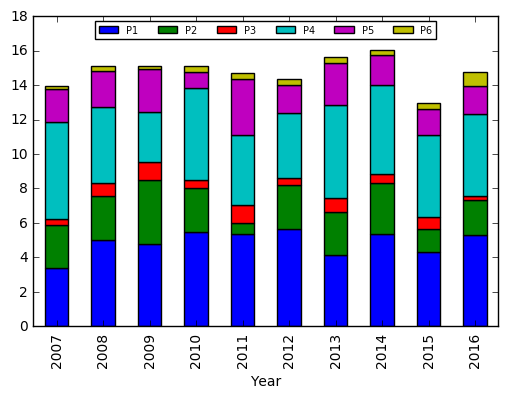

In [8]:
graf = po_letih[['P1','P2','P3','P4','P5','P6']].mean().plot(kind='bar', stacked=True, figsize=(6, 4), fontsize=10)
graf.legend(fontsize=7, loc=9, ncol=6)


Zanimiv je tudi podatek, katere države so najuspešnejše na tekmovanju. Ne preseneča, da se v državi z največ prebivalci najdeo najboljši matematiki.

In [9]:
po_drzavah = data.groupby('Short_country_name')
po_drzavah['Points'].mean().sort_values(ascending=False)[:20]

Short_country_name
CHN    33.233333
USA    30.916667
KOR    29.950000
RUS    29.616667
PRK    26.925926
TWN    25.733333
JPN    25.716667
THA    25.500000
VNM    25.350000
IRN    24.716667
SGP    23.816667
ROU    23.783333
CAN    23.683333
TUR    23.616667
UKR    23.533333
GER    22.400000
HUN    22.233333
UNK    22.216667
AUS    22.116667
ITA    21.183333
Name: Points, dtype: float64

Glede na težavnost nalog in predvsem, kako tekmovalci rešujejo naloge pa se vsako leto tudi določijo meje za medalje. Spodnji graf prikazuje, kako so se meje za zlato, srebro in bron spreminjale skozi leta.

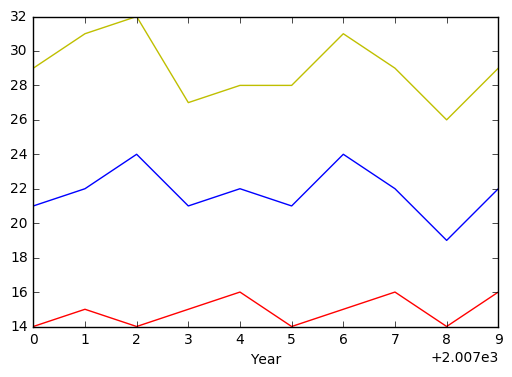

In [10]:
zlati= data[data.Achievement == 'Gold medal']
zlati.groupby('Year')['Points'].min().plot(color='y')
srebrni= data[data.Achievement == 'Silver medal']
srebrni.groupby('Year')['Points'].min().plot(color='b')
bronasti= data[data.Achievement == 'Bronze medal']
bronasti.groupby('Year')['Points'].min().plot(color='r')

Tekmovanje je razdeljeno na dva dni. Vsak dan pa je zadnja naloga najtežja. Poglejmo si iz katerih držav prihajajo tekmovalci, ki so na tekmovanju pravilno rešili obe najtežji nalogi.

In [11]:
najboljsi_resevalci = data[(data.P3== 7) & (data.P6==7)].groupby('Short_country_name')
najboljsi_resevalci.size()

Short_country_name
AUS    2
BGR    1
CAN    2
CHN    8
GER    4
HUN    1
JPN    1
KOR    7
RUS    1
SGP    2
TWN    1
UKR    1
USA    4
VNM    1
dtype: int64

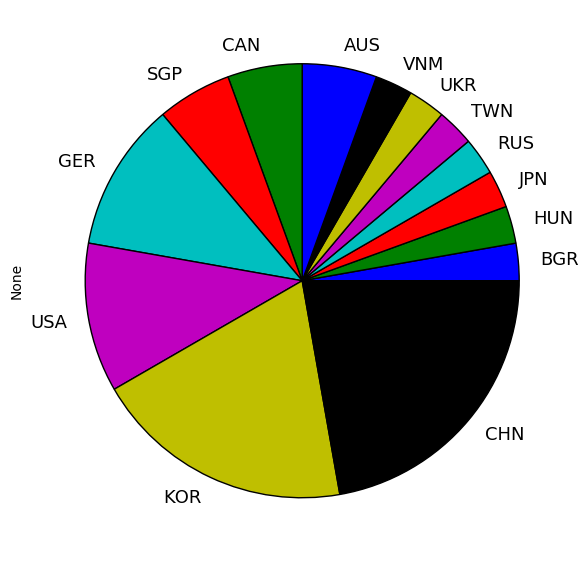

In [12]:
najboljsi_resevalci.size().sort_values().plot(kind='pie',figsize=(7, 7), fontsize=13)

Sedaj pa anlizirajmo še kako uspešna je naša država. Za začetek si oglejmo, kateri tekmovalci so se največkrat udeležili tekmovanja.

In [13]:
slovenci = data[data.Short_country_name == 'SVN'].sort_values('Points', ascending=False)
slovenci.groupby('Name').size().sort_values(ascending=False)[:8]

Name
Matjaž Leonardis          4
Amadej Kristjan Kocbek    4
Žiga Krajnik              3
Anja Komatar              3
Matej Aleksandrov         3
Nik Jazbinšek             3
Juan Gabriel Kostelec     3
Veno Mramor               3
dtype: int64

Poglejmo si tudi, kateri posamezniki so dosegli največ točk na posameznem tekmovanju.

In [14]:
slovenci[:6]

,Name,Short_country_name,Full_country_name,P1,P2,P3,P4,P5,P6,Points,Rank,Year,Achievement,Percentage
id,,,,,,,,,,,,,,
21760,Vesna Iršič,SVN,Slovenia,7,7,0,2,3,0,19,151,2012,Bronze medal,45.238095
24952,Juš Kosmač,SVN,Slovenia,7,5,0,7,0,0,19,221,2014,Bronze medal,45.238095
15799,Jure Vogrinc,SVN,Slovenia,3,7,0,7,1,0,18,145,2007,Bronze medal,42.857143
19481,Veno Mramor,SVN,Slovenia,7,7,0,3,0,0,17,182,2012,Bronze medal,40.476190
15799,Jure Vogrinc,SVN,Slovenia,7,1,0,7,2,0,17,199,2008,Bronze medal,40.476190
21761,Juan Gabriel Kostelec,SVN,Slovenia,7,1,0,7,2,0,17,256,2014,Bronze medal,40.476190


Graf, ki primerja povprečne tekmovalca in povprečnega slovenca, pa pokaže, da smo glede na število točk nekoliko pod povprečjem.

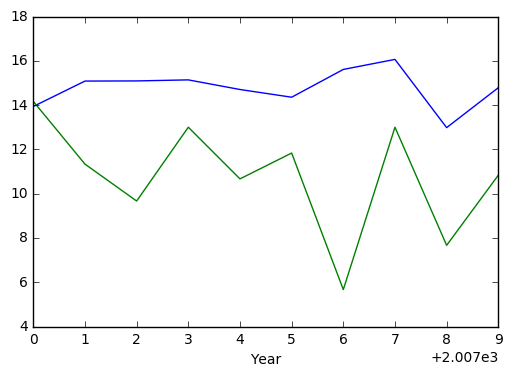

In [15]:
data.groupby('Year')['Points'].mean().plot()
slovenci.groupby('Year')['Points'].mean().plot()

Za konec pa si oglejmo še, kateri slovenec, je skupno dosegel največ točk na tekmovanju.

In [55]:
najuspešnješi = slovenci.groupby('Name')['Points'].sum()
najuspešnješi.sort_values(ascending=False)[:1]


Name
Matjaž Leonardis    50
Name: Points, dtype: int64